<a href="https://colab.research.google.com/github/rezaserajian/Homework3part1/blob/main/CS206D_Forgettability_Shap_Research_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

# 1.0 Import Data

Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_raw = wine_quality.data.features
y_raw = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Features and target
X_raw = wine_quality.data.features
y_raw = wine_quality.data.targets


In [ ]:
# Check class distribution
class_distribution = y_raw.value_counts()
print("Class distribution in the target variable:")
print(class_distribution)


Class distribution in the target variable:
quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64


In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Features and target
X_raw = wine_quality.data.features
y_raw = wine_quality.data.targets

# Check class distribution
class_distribution = y_raw.value_counts()
print("Class distribution in the target variable:")
print(class_distribution)


Class distribution in the target variable:
quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64


In [ ]:
print(y_raw.value_counts())


quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64


In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# Apply SMOTE with reduced k_neighbors
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_raw, y_raw)

# Check the new class distribution
print("New class distribution:")
print(y_resampled.value_counts())


New class distribution:
quality
3          2836
4          2836
5          2836
6          2836
7          2836
8          2836
9          2836
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 13896
Validation set size: 2978
Test set size: 2978


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Validate the model
y_val_pred = svm_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Classification Report:
              precision    recall  f1-score   support

           3       0.93      0.99      0.96       425
           4       0.77      0.86      0.81       426
           5       0.62      0.61      0.61       426
           6       0.52      0.31      0.39       425
           7       0.54      0.57      0.56       425
           8       0.69      0.79      0.74       425
           9       1.00      1.00      1.00       426

    accuracy                           0.73      2978
   macro avg       0.72      0.73      0.72      2978
weighted avg       0.72      0.73      0.72      2978



In [ ]:
# Test the model
y_test_pred = svm_model.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Classification Report:
              precision    recall  f1-score   support

           3       0.93      0.99      0.96       425
           4       0.76      0.83      0.79       425
           5       0.64      0.62      0.63       425
           6       0.55      0.34      0.42       426
           7       0.57      0.59      0.58       426
           8       0.71      0.86      0.78       426
           9       1.00      1.00      1.00       425

    accuracy                           0.75      2978
   macro avg       0.74      0.75      0.74      2978
weighted avg       0.74      0.75      0.74      2978



In [ ]:
full_data.info()
# Splitting dataset into train (70%), validation (15%), and test (15%)
X = full_data.drop('quality', axis=1)  # Features
y = full_data['quality']  # Target

# First, split train and temp (train=70%, temp=30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then split temp into validation and test (50% each of the temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 13896
Validation set size: 2978
Test set size: 2978


In [ ]:
print("Training class distribution:")
print(y_train.iloc[:, 0].value_counts())

print("Validation class distribution:")
print(y_val.iloc[:, 0].value_counts())

print("Test class distribution:")
print(y_test.iloc[:, 0].value_counts())



Training class distribution:
quality
3    1986
7    1985
4    1985
5    1985
9    1985
8    1985
6    1985
Name: count, dtype: int64
Validation class distribution:
quality
4    426
9    426
5    426
6    425
7    425
8    425
3    425
Name: count, dtype: int64
Test class distribution:
quality
6    426
8    426
7    426
9    425
4    425
3    425
5    425
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import classification_report

# Validate the model
y_val_pred = svm_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = svm_model.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Classification Report:
              precision    recall  f1-score   support

           3       0.93      0.99      0.96       425
           4       0.77      0.86      0.81       426
           5       0.62      0.61      0.61       426
           6       0.52      0.31      0.39       425
           7       0.54      0.57      0.56       425
           8       0.69      0.79      0.74       425
           9       1.00      1.00      1.00       426

    accuracy                           0.73      2978
   macro avg       0.72      0.73      0.72      2978
weighted avg       0.72      0.73      0.72      2978

Test Classification Report:
              precision    recall  f1-score   support

           3       0.93      0.99      0.96       425
           4       0.76      0.83      0.79       425
           5       0.64      0.62      0.63       425
           6       0.55      0.34      0.42       426
           7       0.57      0.59      0.58       426
           8    

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

# Perform Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Evaluate with the best model
best_model = grid.best_estimator_
y_test_pred = best_model.predict(X_test)
print("Test Classification Report with Best Model:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Test Classification Report with Best Model:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       425
           4       0.95      0.99      0.97       425
           5       0.81      0.72      0.76       425
           6       0.68      0.73      0.70       426
           7       0.89      0.88      0.89       426
           8       0.98      1.00      0.99       426
           9       1.00      1.00      1.00       425

    accuracy                           0.90      2978
   macro avg       0.90      0.90      0.90      2978
weighted avg       0.90      0.90      0.90      2978



In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, scoring='accuracy')

# Print feature importance
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {i}: {perm_importance.importances_mean[i]:.4f}")


Feature 10: 0.2564
Feature 7: 0.1833
Feature 0: 0.1818
Feature 8: 0.1650
Feature 6: 0.1592
Feature 5: 0.1482
Feature 1: 0.1420
Feature 3: 0.1384
Feature 4: 0.1367
Feature 2: 0.1343
Feature 9: 0.1204


In [ ]:
pip install shap


In [ ]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(svm_model.predict, X_test)
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


PermutationExplainer explainer:   6%|▋         | 192/2978 [1:50:17<26:48:46, 34.65s/it]


KeyboardInterrupt: 

In [ ]:
# Check if there are duplicates
full_data.duplicated().sum()
# Splitting dataset into train (70%), validation (15%), and test (15%)
X = full_data.drop('quality', axis=1)  # Features
y = full_data['quality']  # Target

# First, split train and temp (train=70%, temp=30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then split temp into validation and test (50% each of the temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


1179

In [ ]:
full_data.drop_duplicates(inplace=True)
# Splitting dataset into train (70%), validation (15%), and test (15%)
X = full_data.drop('quality', axis=1)  # Features
y = full_data['quality']  # Target

# First, split train and temp (train=70%, temp=30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then split temp into validation and test (50% each of the temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


In [ ]:
full_data.shape
# Splitting dataset into train (70%), validation (15%), and test (15%)
X = full_data.drop('quality', axis=1)  # Features
y = full_data['quality']  # Target

# First, split train and temp (train=70%, temp=30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then split temp into validation and test (50% each of the temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


(5318, 12)

# 2.0 Dataset Preprocessing

We are splitting the dataset into 3 sets, including:

- Validation: 15% (model never seen it);
- Test: 15%;
- Train: 70%.

In [ ]:
# Randomly take 15% of the dataset as validation set, seeding: 27
validation_data = full_data.sample(frac=0.15, random_state=27)
train_test_data = full_data.drop(validation_data.index)
# Splitting dataset into train (70%), validation (15%), and test (15%)
X = full_data.drop('quality', axis=1)  # Features
y = full_data['quality']  # Target

# First, split train and temp (train=70%, temp=30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Then split temp into validation and test (50% each of the temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


In [ ]:
X_val = validation_data.drop('quality', axis=1)
y_val = validation_data['quality']

In [ ]:
# Take the dataset's quality column as y, the rest as X
y = train_test_data['quality']
X = train_test_data.drop('quality', axis=1)

print(f'Feature train_test shape: {X.shape}')
print(f'Label train_test shape: {y.shape}')

Feature train_test shape: (4520, 11)
Label train_test shape: (4520,)


In [ ]:
from sklearn.model_selection import train_test_split
# Train test split of the data using train_test_split function, with a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27, test_size=0.3)

----------

Please start from here:

As coded above, X_val y_val are validation set. Please do not use it until the end when validate the model to check the accuracy.

For training, X_train, X_test, y_train, y_test are defined for model training.

Before next meeting on Saturday:

1. Zhanyang: ResNet
2. Dylan: Neural Networks, logistic regression
3. Eric: JTT
4. Reza: SVM

Everyone:

Look for libraries for
**Forgettability Score**
to finding instances that is unforgettable and forgettable.





#3.0 Modeling

In [ ]:
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
import shap
X100 = shap.utils.sample(X, 100)
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

PermutationExplainer explainer: 6498it [09:05, 11.73it/s]


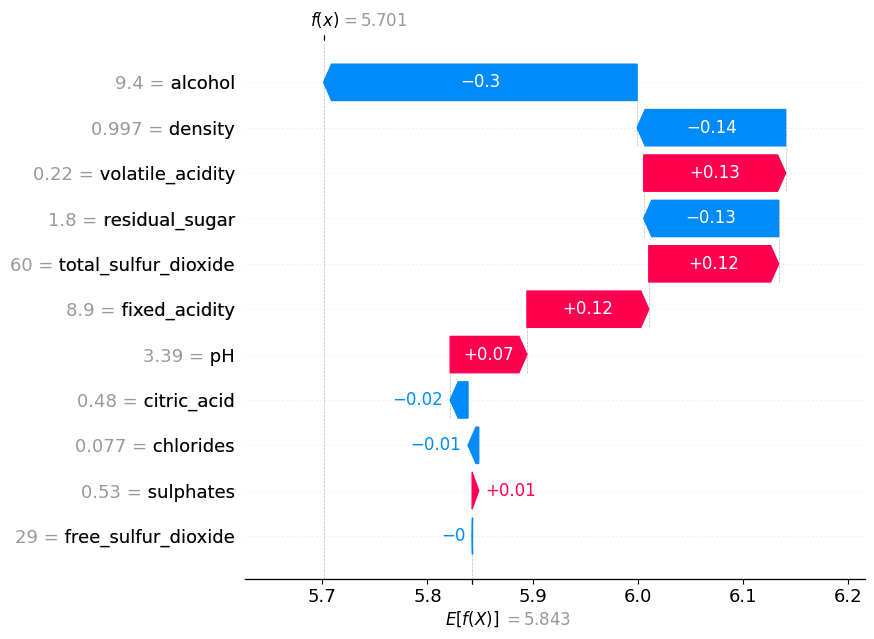

In [ ]:
shap.plots.waterfall(shap_values[20], max_display=14)

In [ ]:
y.iloc[20]

,20
quality,6
